Author: Giuseppe D'Auria

Latest changes: 30-07-23

Description: The purpose of this script is to try to alyze a file containing real scientific data, trying to understand its contents. In this specific case, it is satellite data collected from the surface of the ocean.

In [1]:
import numpy as np
from h5py import File
import matplotlib.pyplot as plt
from datetime import datetime

data = File('chlorophyll.hdf5', 'r')

In [2]:
for x in data.keys():
    print(x)
    print(data[x])

CHL
<HDF5 dataset "CHL": shape (53, 65, 182), type "<f4">
lat
<HDF5 dataset "lat": shape (65,), type "<f4">
lon
<HDF5 dataset "lon": shape (182,), type "<f4">
mask
<HDF5 dataset "mask": shape (65, 182), type "|b1">
time
<HDF5 dataset "time": shape (53,), type "<i4">


In [3]:
#for x in data["lat"]:
#    print(x)
    
print(data['mask'].shape)

print(data['mask'][3].itemsize)

(65, 182)
1


In [4]:
for i in data.keys():
    tot = 1
    
    for j in range(len(data[i].shape)):
        tot = tot*data[i].shape[j]
    
    print(data[i][0].itemsize * tot)


2507960
260
728
11830
212


In [5]:
lat = np.array(data['lat'])
lon = np.array(data['lon'])

print(lat)
print(lon)

[46.1875 45.9375 45.6875 45.4375 45.1875 44.9375 44.6875 44.4375 44.1875
 43.9375 43.6875 43.4375 43.1875 42.9375 42.6875 42.4375 42.1875 41.9375
 41.6875 41.4375 41.1875 40.9375 40.6875 40.4375 40.1875 39.9375 39.6875
 39.4375 39.1875 38.9375 38.6875 38.4375 38.1875 37.9375 37.6875 37.4375
 37.1875 36.9375 36.6875 36.4375 36.1875 35.9375 35.6875 35.4375 35.1875
 34.9375 34.6875 34.4375 34.1875 33.9375 33.6875 33.4375 33.1875 32.9375
 32.6875 32.4375 32.1875 31.9375 31.6875 31.4375 31.1875 30.9375 30.6875
 30.4375 30.1875]
[-8.75 -8.5  -8.25 -8.   -7.75 -7.5  -7.25 -7.   -6.75 -6.5  -6.25 -6.
 -5.75 -5.5  -5.25 -5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.
 -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.
  0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.
  3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75  6.
  6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.
  9.25  9.5   9.75 10.   10.25 10.5  10.75 11

In [6]:
mask = np.array(data['mask'])
mask
len(mask[0, :])
len(mask[:, 0])


65

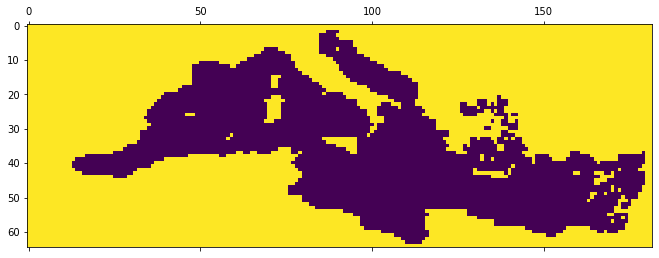

In [7]:
plt.matshow(mask)

In [8]:
time = np.array(data['time'])
chl = np.array(data['CHL'])

In [9]:
print(time)

[1356998400 1357603200 1358208000 1358812800 1359417600 1360022400
 1360627200 1361232000 1361836800 1362441600 1363046400 1363651200
 1364256000 1364860800 1365465600 1366070400 1366675200 1367280000
 1367884800 1368489600 1369094400 1369699200 1370304000 1370908800
 1371513600 1372118400 1372723200 1373328000 1373932800 1374537600
 1375142400 1375747200 1376352000 1376956800 1377561600 1378166400
 1378771200 1379376000 1379980800 1380585600 1381190400 1381795200
 1382400000 1383004800 1383609600 1384214400 1384819200 1385424000
 1386028800 1386633600 1387238400 1387843200 1388448000]


In [10]:
print(data['time'].attrs.keys())
print(data['time'].attrs['unit'])

<KeysViewHDF5 ['unit']>
b'Seconds since EPOC'


In [11]:
time_list = []

for i in time:
    time_list.append(datetime.fromtimestamp(i))
#    print(datetime.fromtimestamp(i))

In [12]:
data.close()

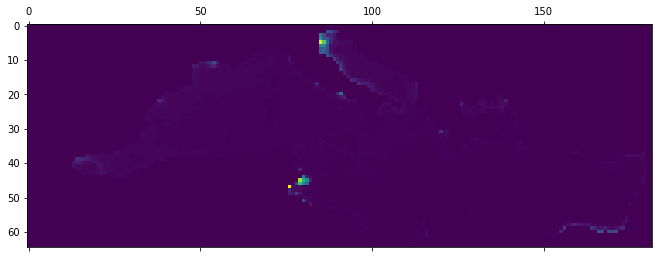

In [13]:
plt.matshow(chl[24,:,:])

These are satellite data that try to estimate the amount of chlorophyll present on the surface layer of the Mediterranean Sea.
Unfortunately, we do not have many direct ways to verify "how much life" there is in the sea; while we tend to think that, on land, there are places rich in vegetation and animals as opposed to desert areas, we tend to imagine the sea as uniform. In reality, this is a mental representation far from the truth. Even in the sea, especially in the oceans, there are real "deserts" of water where life has established itself much less effectively than elsewhere. One of the most widely used biochemical indicators for investigating the biological evolution of a marine area is chlorophyll: it indicates the presence of phytoplankton, the first fundamental step in the marine ecosystem. In particular, the amount of chlorophyll is "relatively" easy to measure, for the simple fact that chlorophyll is green. Through satellite observations, it is possible to measure how much surface emissivity there is in the green color band in a given region of the ocean to get an estimate of the amount of chlorophyll.

In [14]:
on_sea = np.logical_not(mask)
valid_values = chl[:, on_sea]
print(valid_values)
print(valid_values.shape)
temporal_series = valid_values.T

print(temporal_series.shape)

[[1.1450009  0.9830607  0.90837544 ... 0.08936204 0.08204721 0.06282934]
 [1.1083763  0.851194   0.87744445 ... 0.12508567 0.12159512 0.09955353]
 [1.2699465  0.9680949  0.9027088  ... 0.10545719 0.09944168 0.08030081]
 ...
 [0.70114106 0.7269171  0.7116657  ... 0.09888937 0.08757532 0.07286708]
 [1.017753   0.94625634 0.7546997  ... 0.09270707 0.08612625 0.07260755]
 [1.3548378  1.7452166  0.7116657  ... 0.09235835 0.08936821 0.07508697]]
(53, 4117)
(4117, 53)


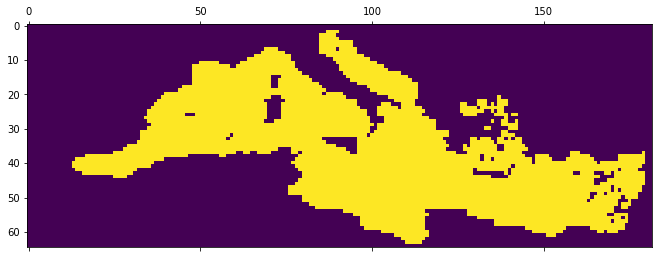

In [15]:
plt.matshow(on_sea)

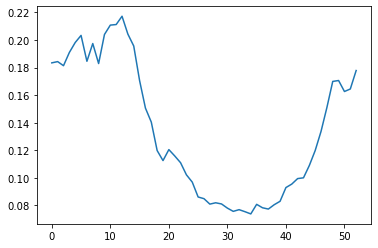

In [16]:
mean = np.mean(temporal_series, axis=0)
mean.shape
plt.plot(mean)

From the plot in which are represented average amounts of chlorophyll in the Mediterranean Sea during a one-year time series, we can notice that in the summer there is a sensible deplemention of chlorophyll concentrations probably due to the higher water temperature.

In [17]:
mean1 = np.mean(temporal_series)            # mean amount of chlorophyll in the Mediterranean Sea;
mean2 = np.mean(temporal_series, axis =0)   # weekly averages of chlorophyll mean amounts in Mediterranean Sea;
mean3 = np.mean(temporal_series, axis =1)   # for each point, how much chlorophyll is there on average during the year;

In [18]:
print(mean1)
print(mean2)
print(mean3)

0.13457444
[0.18340145 0.18431646 0.18134713 0.19093423 0.19815074 0.2033097
 0.18455099 0.19741642 0.18291095 0.20399705 0.21077812 0.21119094
 0.21720706 0.20423877 0.1956317  0.17055301 0.15059309 0.14044201
 0.11983097 0.11254054 0.12050638 0.11593191 0.11100931 0.10223678
 0.09692601 0.08615123 0.08493154 0.08098738 0.08195038 0.08110029
 0.07808125 0.07573089 0.076962   0.07549427 0.07387859 0.0808174
 0.07833415 0.077401   0.08055161 0.08303437 0.09298626 0.09550649
 0.09949345 0.10005289 0.10899145 0.11982631 0.13372992 0.15101188
 0.16994457 0.17060372 0.16263646 0.16445655 0.17784776]
[1.1270348  0.90524495 0.7612669  ... 0.0714957  0.06487872 0.06623279]


In [19]:
variations = temporal_series - mean
variations.shape
#plt.plot(variations)

(4117, 53)

In [20]:
l2_error = np. sqrt (np.sum( variations * variations , axis =1))
l2_error.shape

(4117,)

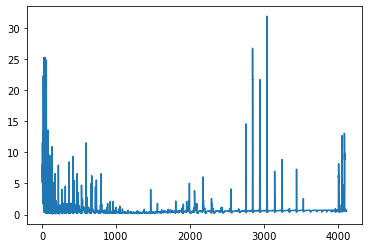

In [21]:
plt.plot(l2_error)

In [22]:
l2_error_map = np.zeros((65, 182))
l2_error_map[ mask ] = -1
l2_error_map[ on_sea ] = l2_error

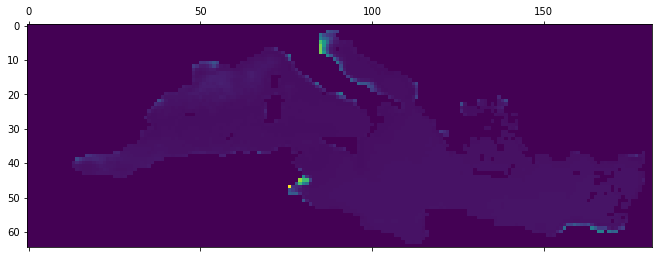

In [23]:
plt.matshow(l2_error_map)